<a href="https://colab.research.google.com/github/musman2012/imaging-research/blob/master/OpenCV/ResearchPaperImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mat4py
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mat4py import loadmat

#data = loadmat('/content/2macula.mat')


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import matplotlib.image as mpimg
import cv2 as cv

#matfile = io.loadmat('/content/2macula.mat')


In [ ]:
## This implementation is based on following research paper:
## https://www.longdom.org/open-access/contribution-to-intraretinal-fluid-segmentation-in-optical-coherence-tomography-by-using-automatic-personalized-thresholding-2155-9570-1000738.pdf

This code is an implementation of [this research paper](https://www.longdom.org/open-access/contribution-to-intraretinal-fluid-segmentation-in-optical-coherence-tomography-by-using-automatic-personalized-thresholding-2155-9570-1000738.pdf)


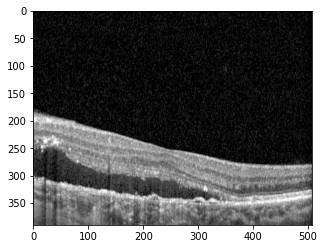

In [14]:
import os

MIN_ROW = 10
MAX_ROW = 400
RANGE_THRESHOLD = 145

os.chdir('/content/drive/My Drive/Colab Notebooks/AMD/Cropped_Data/')
image_files = os.listdir()
#os.chdir('/content/drive/My Drive/Colab Notebooks/AMD/Cropped_Data/')
#for img_name in image_files:
img_name = image_files[25]
img = cv.imread(img_name)
#img = img[MIN_ROW:MAX_ROW,500:,:]
#new_name = 'cropped_'+img_name
#cv.imwrite(new_name, img)

count, th = 1, 10
fig = plt.figure(figsize=(5, 5))

plt.imshow(img)
plt.show()


In [6]:
def show_img(img2show):
  fig = plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()

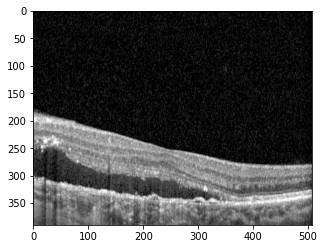

In [7]:
## Apply denoising (Median Filters [23,24,37] )
## 3 × 3 pixels 
filtered_img = cv.medianBlur(img, 3)
show_img(filtered_img)


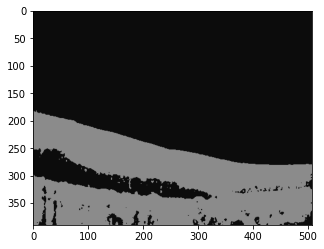

In [8]:
## Apply K-Mean Clustering (Color Quantization)
Z = filtered_img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((filtered_img.shape))
#cv.imshow('res2',res2)
#show_img(res2)
fig = plt.figure(figsize=(5, 5))
plt.imshow(res2)
plt.show()
#cv.waitKey(0)
#cv.destroyAllWindows()


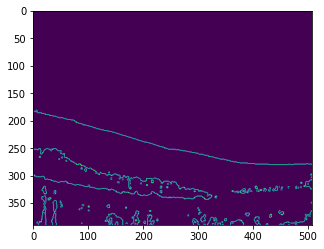

In [9]:
### Apply Canny Edge Detector
edges = cv.Canny(res2,50,200)

fig = plt.figure(figsize=(5, 5))
plt.imshow(edges)
plt.show()

(390, 508)


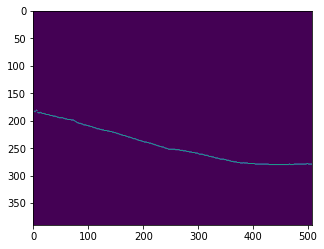

In [10]:
## Detect position of ILM
print(edges.shape) ## 390, 508 ==> Rows x Cols
rows, cols = edges.shape
#center = cols//2
ilm_pos = []
seg_img = np.zeros((rows, cols), np.uint8)
for col in range(cols-1, 0, -1):
  for row in range(rows):
    if edges[row, col] == 255:
      seg_img[row, col] = 255
      pos = (row, col)
      ilm_pos.append(pos)
      #print("In the loop", row, col)
      break

fig = plt.figure(figsize=(5, 5))
plt.imshow(seg_img)
plt.show()

(390, 508, 3)


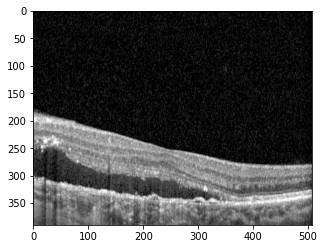

In [28]:
print(img.shape)
img_ilm = img.copy()
for position in ilm_pos:
  (row, col) = position
  img_ilm[row:row+2, col, 0] = 255

fig = plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

In [39]:
print(filtered_img.shape)

(390, 508, 3)


## Detecting RPE (HRC)

In [37]:
print(filtered_img.shape)

(390, 508, 3)


In [38]:
print(filtered_img.shape)

(390, 508, 3)


In [36]:
print("Helo")

Helo


In [29]:
gray = cv.cvtColor(filtered_img, cv.COLOR_BGR2GRAY)
# perform a naive attempt to find the (x, y) coordinates of
# the area of the image with the largest intensity value
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(gray)
#cv.circle(img_ilm, maxLoc, 5, (255, 0, 0), 2)


In [35]:
print("Hello")

Hello


In [33]:
#fig = plt.figure(figsize=(5, 5))
#plt.imshow(img)
#plt.show()
print("Hello")

Hello
